## Exercício:

1. Baixar alguns datasets de classificação do repositório [Toy datasets](https://scikit-learn.org/stable/datasets/toy_dataset.html) do Scikit-Learn e classificá-los usando SVM. Verificar se funciona melhor com SVM linear ou com kernel RBF, e testar diferentes valores de $C$.

In [26]:
#Let's import the data from sklearn
from sklearn.datasets import load_wine
wine=load_wine()

print('wine.target: ', wine.target[[10, 80, 140]])
print('list(wine.target_names): ', list(wine.target_names))

wine.target:  [0 1 2]
list(wine.target_names):  ['class_0', 'class_1', 'class_2']


In [27]:
wine

{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

In [28]:
import pandas as pd
import numpy as np

#Conver to pandas dataframe
data=pd.DataFrame(data=np.c_[wine['data'],wine['target']],columns=wine['feature_names']+['target'])

#Check data with info function
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [29]:
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


In [30]:
# Search for missing, NA and null values)


(data.isnull() | data.empty | data.isna()).sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [31]:
#Let's see the frequency of the variable target.
#Convert variable to categorical.
data.target=data.target.astype('int64').astype('category')

#Frequency.
freq=data['target'].value_counts()

freq

1    71
0    59
2    48
Name: target, dtype: int64

In [43]:
y = data['target']
y

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: category
Categories (3, int64): [0, 1, 2]

In [41]:
x = data.drop(["target"], axis=1)
x

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


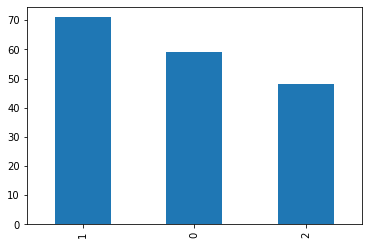

In [42]:
#Let's check graphically.
freq.plot(kind='bar')

In [44]:
#Let's show a summary of teh dataset where we can see 
# the basic statistic data.
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


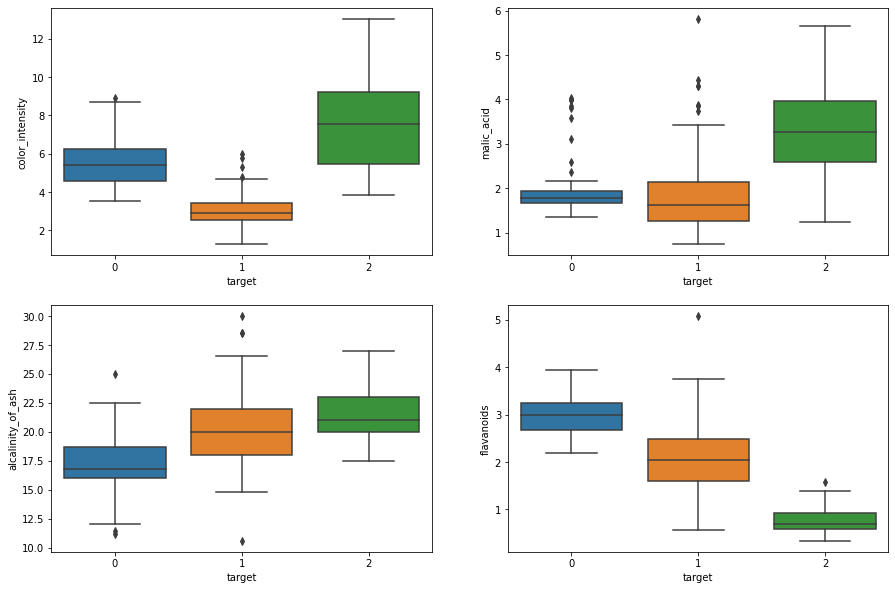

In [45]:
"""
Em segundo lugar, vejamos o box plot do dataset, que nos mostra a representação 
visual de como nossos dados estão espalhados pelo plano. Box plot é um gráfico 
baseado em percentil, que divide os dados em quatro quartis de 25% cada. 
Este método é usado em análise estatística para entender várias medidas, 
como média, mediana e desvio.
"""
from matplotlib import pyplot as plt
import seaborn as sns

# Podemos observar um recurso individual no Seaborn por meio de um boxplot
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x='target',y='color_intensity',data=data)
plt.subplot(2,2,2)
sns.boxplot(x='target',y='malic_acid',data=data)
plt.subplot(2,2,3)
sns.boxplot(x='target',y='alcalinity_of_ash',data=data)
plt.subplot(2,2,4)
sns.boxplot(x='target',y='flavanoids',data=data)
plt.show()

In [73]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=13, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [54]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, random_state=0)

In [74]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: user 655 ms, sys: 1.06 ms, total: 657 ms
Wall time: 661 ms
{'svc__C': 1, 'svc__gamma': 0.005}


In [75]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

In [77]:
from sklearn.metrics import classification_report

# Como vimos anteriormente, podemos também gerar um relatório com os resultados:

print(classification_report(ytest, yfit))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00         8

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [90]:
data.target

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: category
Categories (3, int64): [0, 1, 2]

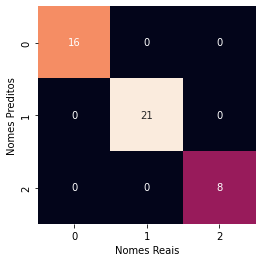

In [92]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('Nomes Reais')
plt.ylabel('Nomes Preditos');